This notebook calculates the values of the mean, variance, burst size and frequency of the mRNA produced by each virtual cell, whilst simultaneiously changing the parameter values for Kon, Koff and Kt by 10% each meta simulation. 

The data is then represented graphically as variance over mean, burst over mean, frequency over mean, and finally the variance over the increment parameter values for Kon, Koff and Kt. 

Please run all cells in order as lists and packages are called prior to some cells. 

In [26]:
### Koff 1-step model, with increasing parameters from 10 times less to 10 times more than the default ###

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import random as rng
import math
from statistics import mean

#instantiate lists for the data to be appended to
si_koff_var = [];
si_koff_mean = [];
iburst_koff = [];
ifreq_koff = [];

#clear the lists for multiple runs
iburst_koff.clear()
ifreq_koff.clear()
si_koff_var.clear()
si_koff_mean.clear()
loop = 0

#initial parameter values (koff is 10 times smaller than default)
kon_ = 0.0025 #min-1
koff_ = 0.0001 #min-1  
k1_ = 4 #mRNA/min
d1_ = 0.003 #min, corresponding to half-life of approximately 30 min 

for j in range(20): #iterate 20 times, chanding parameter values by +10% every loop
    X2ends = [];
    X2mean = [];
    X2ends.clear()
    X2mean.clear()

    for i in range(4000): #simulate 4000 cells
        #initial conditions and variables
        x0=0  #ton/off variable
        x1=0  #Genes on
        x2=0  #mRNA level

        #reaction rates
        kon = kon_ #min-1
        koff = koff_ #min-1  
        k1 = k1_ #mRNA/min
        d1 = d1_ #min, corresponding to half-life of approximately 30 min 

        #Parameters
        maxTime = 180.0   # maximum simulation time
        time=0
        X1=[x1]
        X2=[x2]

        T=[time]
        while time < maxTime:
            #reaction propensities
            a1=kon*(2.0-x1) #gene activation
            a2=koff*x1    # gene inactivation
            a3=k1*x1 # mRNA production
            a4=d1*x2 # mRNA degradation

            a0=a1+a2+a3+a4   #total propensity

            #Time to next reaction
            r1 = rng.random() #uniform random number
            tau    = 1.0/a0 * math.log(1.0/r1)
            time  += tau

            #which reaction to occur?
            r2 = rng.random() #uniform random number
            if r2<a1/a0: 
                x1+=1
            if (r2>=a1/a0 and r2<(a1+a2)/a0):
                x1-=1
            if (r2>=(a1+a2)/a0 and r2<(a1+a2+a3)/a0):
                x2+=1
            if (r2>=(a1+a2+a3)/a0 and r2<(a1+a2+a3+a4)/a0):
                x2-=1   
            X1.append(x1)
            X2.append(x2)
        X2ends.append(X2[-1])
    X2mean.append(mean(X2ends))
    X2mean = mean(X2ends)

    # increase the koff value by 10% every iteration in the 'j' for loop 
    koff_ = koff+0.001*0.1
    loop +=1
    #append data to the lists every iteration in the 'j' loop
    si_koff_mean.append(X2mean)
    si_koff_var.append(np.var(X2ends))
    iburst_koff.append(np.var(X2ends)/X2mean)
    ifreq_koff.append((X2mean/((np.var(X2ends)/X2mean)-1)))
    
    print("loop number: ",loop)
    print("Koff: ", koff)
    print("Mean mRNA: ", X2mean)
    print("Variance: ", np.var(X2ends))
    print("burst size: ", np.var(X2ends)/X2mean)
    print("frequency: ",(X2mean/((np.var(X2ends)/X2mean)-1)))
    print(" ")
    

loop number:  1
Koff:  0.0001
Mean mRNA:  232.38725
Variance:  66492.8667874375
burst size:  286.12958235633624
frequency:  0.8150232889885752
 
loop number:  2
Koff:  0.0002
Mean mRNA:  231.401
Variance:  66888.284199
burst size:  289.05788738596635
frequency:  0.8033142299969303
 
loop number:  3
Koff:  0.00030000000000000003
Mean mRNA:  235.75825
Variance:  65160.611306937506
burst size:  276.3874066207121
frequency:  0.8560966998926974
 
loop number:  4
Koff:  0.0004
Mean mRNA:  226.797
Variance:  65867.650291
burst size:  290.4255801046751
frequency:  0.7836107641832332
 
loop number:  5
Koff:  0.0005
Mean mRNA:  226.82075
Variance:  65179.503119437504
burst size:  287.36128912120034
frequency:  0.7920789527665514
 


KeyboardInterrupt: 

In [27]:
### Kon 1-step model, with increasing parameters from 10 times less to 10 times more than the default ###

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import random as rng
import math
from statistics import mean

#instantiate lists for the data to be appended to
si_kon_var = [];
si_kon_mean = [];
iburst_kon = [];
ifreq_kon = [];
loop = 0

#clear the lists for multiple runs
iburst_kon.clear()
ifreq_kon.clear()
si_kon_var.clear()
si_kon_mean.clear()

#initial parameter values (kon is 10 times smaller than default)
kon_ = 0.00025 #min-1
koff_ = 0.001 #min-1  
k1_ = 4 #mRNA/min
d1_ = 0.003 #min, corresponding to half-life of approximately 30 min 

for j in range(20): #iterate 20 times, chanding parameter values by +10% every loop
    X2ends = [];
    X2mean = [];
    X2ends.clear()
    X2mean.clear()

    for i in range(4000): #simulate 4000 cells
        #initial conditions and variables
        x0=0  #ton/off variable
        x1=0  #Genes on
        x2=0  #mRNA level

        #reaction rates
        kon = kon_ #min-1
        koff = koff_ #min-1  
        k1 = k1_ #mRNA/min
        d1 = d1_ #min, corresponding to half-life of approximately 30 min 

        #Parameters
        maxTime = 180.0   # maximum simulation time
        time=0
        X1=[x1]
        X2=[x2]

        T=[time]
        while time < maxTime:
            #reaction propensities
            a1=kon*(2.0-x1) #gene activation
            a2=koff*x1    # gene inactivation
            a3=k1*x1 # mRNA production
            a4=d1*x2 # mRNA degradation

            a0=a1+a2+a3+a4   #total propensity

            #Time to next reaction
            r1 = rng.random() #uniform random number
            tau    = 1.0/a0 * math.log(1.0/r1)
            time  += tau

            #which reaction to occur?
            r2 = rng.random() #uniform random number
            if r2<a1/a0: 
                x1+=1
            if (r2>=a1/a0 and r2<(a1+a2)/a0):
                x1-=1
            if (r2>=(a1+a2)/a0 and r2<(a1+a2+a3)/a0):
                x2+=1
            if (r2>=(a1+a2+a3)/a0 and r2<(a1+a2+a3+a4)/a0):
                x2-=1   
            X1.append(x1)
            X2.append(x2)
        X2ends.append(X2[-1])
    X2mean.append(mean(X2ends))
    X2mean = mean(X2ends)

    kon_=kon+0.0025*0.1 
    loop += 1
    
    #append data to lists
    si_kon_mean.append(X2mean)
    si_kon_var.append(np.var(X2ends))
    iburst_kon.append(np.var(X2ends)/X2mean)
    ifreq_kon.append((X2mean/((np.var(X2ends)/X2mean)-1)))
    
    print("loop number: ",loop)
    print("Kon: ", kon)
    print("Mean mRNA: ", X2mean)
    print("Variance: ", np.var(X2ends))
    print("burst size: ", np.var(X2ends)/X2mean)
    print("frequency: ",(X2mean/((np.var(X2ends)/X2mean)-1)))
    print(" ")
    

loop number:  1
Kon:  0.00025
Mean mRNA:  24.6965
Variance:  8958.69538775
burst size:  362.7516201789727
frequency:  0.06826921739225847
 
loop number:  2
Kon:  0.0005
Mean mRNA:  50.04775
Variance:  17850.7099699375
burst size:  356.67357613354244
frequency:  0.140712589740456
 
loop number:  3
Kon:  0.00075
Mean mRNA:  73.81825
Variance:  25391.360216937497
burst size:  343.9713108470804
frequency:  0.21523155921608011
 
loop number:  4
Kon:  0.001
Mean mRNA:  100.674
Variance:  33152.54472400001
burst size:  329.3059253034548
frequency:  0.30664691752653117
 
loop number:  5
Kon:  0.00125
Mean mRNA:  121.779
Variance:  39745.835659000004
burst size:  326.37676166662567
frequency:  0.37427073579634507
 


KeyboardInterrupt: 

In [28]:
### Kt 1-step model, with increasing parameters from 10 times less to 10 times more than the default ###

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import random as rng
import math
from statistics import mean

#instantiate lists for the data to be appended to
si_kt_var = [];
si_kt_mean = [];
iburst_kt = [];
ifreq_kt = [];
loop = 0

#clear the lists for multiple runs
iburst_kt.clear()
ifreq_kt.clear()
si_kt_var.clear()
si_kt_mean.clear()

#initial parameter values (kt is 10 times smaller than default)
kon_ = 0.0025 #min-1
koff_ = 0.001 #min-1  
k1_ = 0.4 #mRNA/min
d1_ = 0.003 #min, corresponding to half-life of approximately 30 min 

for j in range(20): #iterate 20 times, chanding parameter values by +10% every loop 
    X2ends = [];
    X2mean = [];
    X2ends.clear()
    X2mean.clear()

    for i in range(4000): #simulate 4000 cells
        #initial conditions and variables
        x0=0  #ton/off variable
        x1=0  #Genes on
        x2=0  #mRNA level

        #reaction rates
        kon = kon_ #min-1
        koff = koff_ #min-1  
        k1 = k1_ #mRNA/min
        d1 = d1_ #min, corresponding to half-life of approximately 30 min 

        #Parameters
        maxTime = 180.0   # maximum simulation time
        time=0
        X1=[x1]
        X2=[x2]

        T=[time]
        while time < maxTime:
            #reaction propensities
            a1=kon*(2.0-x1) #gene activation
            a2=koff*x1    # gene inactivation
            a3=k1*x1 # mRNA production
            a4=d1*x2 # mRNA degradation

            a0=a1+a2+a3+a4   #total propensity

            #Time to next reaction
            r1 = rng.random() #uniform random number
            tau    = 1.0/a0 * math.log(1.0/r1)
            time  += tau

            #which reaction to occur?
            r2 = rng.random() #uniform random number
            if r2<a1/a0: 
                x1+=1
            if (r2>=a1/a0 and r2<(a1+a2)/a0):
                x1-=1
            if (r2>=(a1+a2)/a0 and r2<(a1+a2+a3)/a0):
                x2+=1
            if (r2>=(a1+a2+a3)/a0 and r2<(a1+a2+a3+a4)/a0):
                x2-=1   
            X1.append(x1)
            X2.append(x2)
        X2ends.append(X2[-1])
    X2mean.append(mean(X2ends))
    X2mean = mean(X2ends)
    
    #increase k1 by 10% every loop
    k1_ = k1+4*0.1
    loop += 1
    
    si_kt_mean.append(X2mean)
    si_kt_var.append(np.var(X2ends))
    iburst_kt.append(np.var(X2ends)/X2mean)
    ifreq_kt.append((X2mean/((np.var(X2ends)/X2mean)-1)))
    
    print("loop number: ",loop)
    print("Kt: ", k1)
    print("Mean mRNA: ", X2mean)
    print("Variance: ", np.var(X2ends))
    print("burst size: ", np.var(X2ends)/X2mean)
    print("frequency: ",(X2mean/((np.var(X2ends)/X2mean)-1)))
    print(" ")
    

loop number:  1
Kt:  0.4
Mean mRNA:  23.09125
Variance:  670.0124234374999
burst size:  29.015857670654466
frequency:  0.8242207064103982
 
loop number:  2
Kt:  0.8
Mean mRNA:  44.88
Variance:  2583.3326
burst size:  57.560886809269164
frequency:  0.7934811940155984
 
loop number:  3
Kt:  1.2000000000000002
Mean mRNA:  65.881
Variance:  5528.558838999999
burst size:  83.9173485375146
frequency:  0.7945381896792469
 
loop number:  4
Kt:  1.6
Mean mRNA:  89.46275
Variance:  10061.738112437499
burst size:  112.46846438811124
frequency:  0.8025834974141953
 


KeyboardInterrupt: 

/Users/mac/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Variance over the mean')

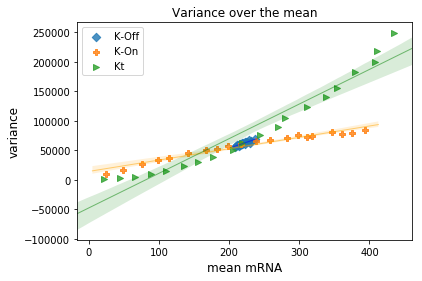

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

####    K-on, K-off and Kt Var over Mean   #### 

x = si_koff_mean
y = si_koff_var
a = si_kon_mean
b = si_kon_var
p = si_kt_mean
q = si_kt_var

sns.regplot(x, y, line_kws={"color":"blue","alpha":0.5,"lw":1}, marker='D', label = 'K-Off')
sns.regplot(a, b, line_kws={"color":"orange","alpha":0.5,"lw":1}, marker='P', label = 'K-On')
sns.regplot(p, q, line_kws={"color":"green","alpha":0.5,"lw":1}, marker='>', label = 'Kt')

plt.legend()
plt.xlabel('mean mRNA', fontsize = 12)
plt.ylabel('variance', fontsize = 12)
plt.title('Variance over the mean')

/Users/mac/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Burst size over mean')

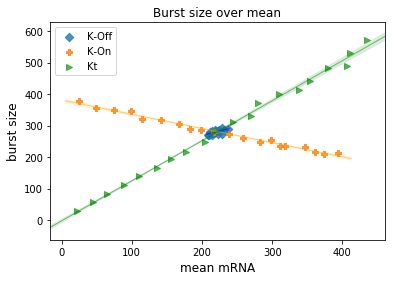

In [6]:
import numpy as np
import matplotlib.pyplot as plt

####    Kon, Koff and Kt Burst over Mean   #### 
x = si_koff_mean
y = iburst_koff
a = si_kon_mean
b = iburst_kon
p = si_kt_mean
q = iburst_kt

sns.regplot(x, y, line_kws={"color":"blue","alpha":0.5,"lw":1}, marker='D', label = 'K-Off')
sns.regplot(a, b, line_kws={"color":"orange","alpha":0.5,"lw":1}, marker='P', label = 'K-On')
sns.regplot(p, q, line_kws={"color":"green","alpha":0.5,"lw":1}, marker='>', label = 'Kt')

plt.legend()

plt.xlabel('mean mRNA', fontsize = 12)
plt.ylabel('burst size', fontsize = 12)
plt.title('Burst size over mean')

/Users/mac/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Frequency over mean')

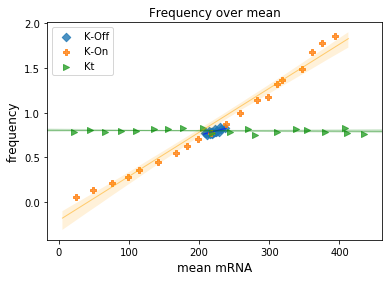

In [7]:
import numpy as np
import matplotlib.pyplot as plt

####    Kon, Koff and Kt freq over Mean   #### 
x = si_koff_mean
y = ifreq_koff
a = si_kon_mean
b = ifreq_kon
p = si_kt_mean
q = ifreq_kt

sns.regplot(x, y, line_kws={"color":"blue","alpha":0.5,"lw":1}, marker='D', label = 'K-Off')
sns.regplot(a, b, line_kws={"color":"orange","alpha":0.5,"lw":1}, marker='P', label = 'K-On')
sns.regplot(p, q, line_kws={"color":"green","alpha":0.5,"lw":1}, marker='>', label = 'Kt')

plt.legend()
plt.xlabel('mean mRNA', fontsize = 12)
plt.ylabel('frequency', fontsize = 12)
plt.title('Frequency over mean')

In [9]:
kon = 0.00025
koff = 0.0001
kt = 0.4
Param_kt = [];
Param_koff = [];
Param_kon = [];

Param_kon.append(0.00025)
Param_koff.append(0.0001)
Param_kt.append(0.4)

for i in range (19):
    kon += 0.0025*0.1
    Param_kon.append(kon)
for i in range(19):
    koff+= 0.001*0.1
    Param_koff.append(koff)
for i in range (19):
    kt+= 4*0.1
    Param_kt.append(kt)
    

print ("Kon: ", Param_kon)
print(' ')
print ("Koff: ", Param_koff)
print(' ')
print ("Kt: ", Param_kt)


Kon:  [0.00025, 0.0005, 0.00075, 0.001, 0.00125, 0.0015, 0.00175, 0.002, 0.0022500000000000003, 0.0025000000000000005, 0.0027500000000000007, 0.003000000000000001, 0.003250000000000001, 0.0035000000000000014, 0.0037500000000000016, 0.004000000000000002, 0.004250000000000002, 0.004500000000000002, 0.0047500000000000025, 0.005000000000000003]
 
Koff:  [0.0001, 0.0002, 0.00030000000000000003, 0.0004, 0.0005, 0.0006000000000000001, 0.0007000000000000001, 0.0008000000000000001, 0.0009000000000000002, 0.0010000000000000002, 0.0011000000000000003, 0.0012000000000000003, 0.0013000000000000004, 0.0014000000000000004, 0.0015000000000000005, 0.0016000000000000005, 0.0017000000000000006, 0.0018000000000000006, 0.0019000000000000006, 0.0020000000000000005]
 
Kt:  [0.4, 0.8, 1.2000000000000002, 1.6, 2.0, 2.4, 2.8, 3.1999999999999997, 3.5999999999999996, 3.9999999999999996, 4.3999999999999995, 4.8, 5.2, 5.6000000000000005, 6.000000000000001, 6.400000000000001, 6.800000000000002, 7.200000000000002, 7.

/Users/mac/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Variance over Param increase, Kon')

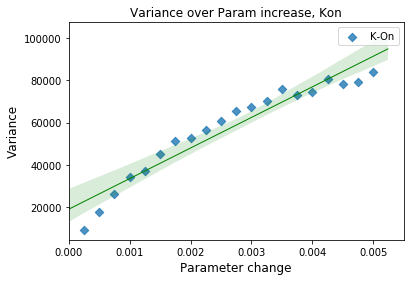

In [23]:
import numpy as np
import matplotlib.pyplot as plt

####    K-ON var/param   #### 
x = Param_kon
y = si_kon_var

sns.regplot(x, y, line_kws={"color":"green","alpha":1,"lw":1}, marker='D', label = 'K-On')

plt.legend()
plt.xlim([0,0.0055])
plt.xlabel('Parameter change', fontsize = 12)
plt.ylabel('Variance', fontsize = 12)
plt.title("Variance over Param increase, Kon")

/Users/mac/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Variance over Param change, Koff')

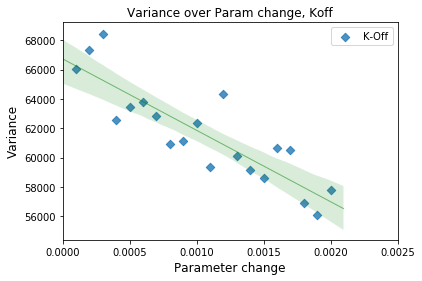

In [22]:
import numpy as np
import matplotlib.pyplot as plt

####    K-ON var/param   #### 
x = Param_koff
y = si_koff_var

sns.regplot(x, y, line_kws={"color":"green","alpha":0.5,"lw":1}, marker='D', label = 'K-Off')

plt.legend()
plt.xlim([0,0.0025])
plt.xlabel('Parameter change', fontsize = 12)
plt.ylabel('Variance', fontsize = 12)
plt.title("Variance over Param change, Koff")

/Users/mac/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Variance over Param increase, Kon')

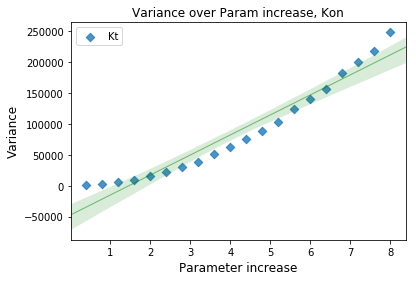

In [12]:
import numpy as np
import matplotlib.pyplot as plt

####    Kt var/param   #### 
x = Param_kt
y = si_kt_var

sns.regplot(x, y, line_kws={"color":"green","alpha":0.5,"lw":1}, marker='D', label = 'Kt')

plt.legend()
plt.xlabel('Parameter increase', fontsize = 12)
plt.ylabel('Variance', fontsize = 12)
plt.title("Variance over Param increase, Kt")